# Which is the Best Pittsburgh Neighborhood? 
## A Data Driven Story by Owen Phillips and Michael Wang  

## First : A Metric
In order to make a data driven argument for the best Pittsburgh neighborhood, we chose to evaluate which neighborhood has the best **Transit Availability** for residents. Transit is an integral part of our lives; we commute to work, travel to see friends and family, and to shop for groceries and other items. Commuting is a largely universal (barring the recent pandemic), and costly activity for Americans, in terms of time and money. In addition, cars, the preferred mode of transport in the US, account for 29% of all American carbon emissions. Our metric is therefore intended to select the neighborhood which affords transit at the lowest cost, in terms of time, money, and environmental degradation. 

## Bloopers 
We also considered metrics such as health, where we planned to examine factors like air quality, proximity to healthcare, and access to healthy foods. 

## Sub-Metrics and Datasets
In order to quantify the transit availability for a given neighborhood, we examined the convenience of accessing common methods of transit for Pittsburgh residents. While we originally planned to include a walkability metric, we decided that given Pittsburgh’s incredibly hilly topography, walking is not a feasible option for the majority of intra-city transit. Naturally, seeing as automobile transit is the first choice for many Americans, we included a driveability metric, as measured by average daily car volumes according to city traffic cameras. We considered higher car volumes to indicate higher traffic, which indicates lower driveability. Allegheny county also has a bus-oriented transit system, PAAC, which operates throughout the city. We chose bus access as a submetric to reflect access to the PAAC system, as measured by the number of Port Authority bus stops in a given neighborhood. Because both car and bus transit rely on the road system, we also selected a third metric, road obstructions, as measured by the number of “right of way” permits issued by the city in a given neighborhood. Because these permits are required to perform construction in roadways, they measure construction related obstructions. 

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
uid_ngh_match = {} 
traffic_ngh_match = {}
paac_ngh_match = {} 
permits_ngh_match = {} 

raw_uids = open("ngh_uids.txt", "r").read().split("\n")
for ngh in raw_uids:
    if ( ":" not in ngh ):
        continue
    ngh = ngh.split(":")
    uid_ngh_match[int(ngh[0])] = ngh[1].replace(" ", "")

def fill_from_csv(dest, src): 
    raw_txt = open(src, "r").read().split("\n")
    for line in raw_txt: 
        if ( ":" not in line ):
            continue
        line = line.split(":") 
        uid = int(line[0]) 
        ngh = uid_ngh_match[uid]
        dest[ngh] = float(line[1])    
        
fill_from_csv( traffic_ngh_match, "car_volume_by_ngh.txt")
fill_from_csv( paac_ngh_match, "paac_stops_by_ngh.txt" ) 
fill_from_csv( permits_ngh_match, "permits_by_ngh.txt" ) 

# Grand Reveal  
## First - Everyone's Favorite - Low Traffic 

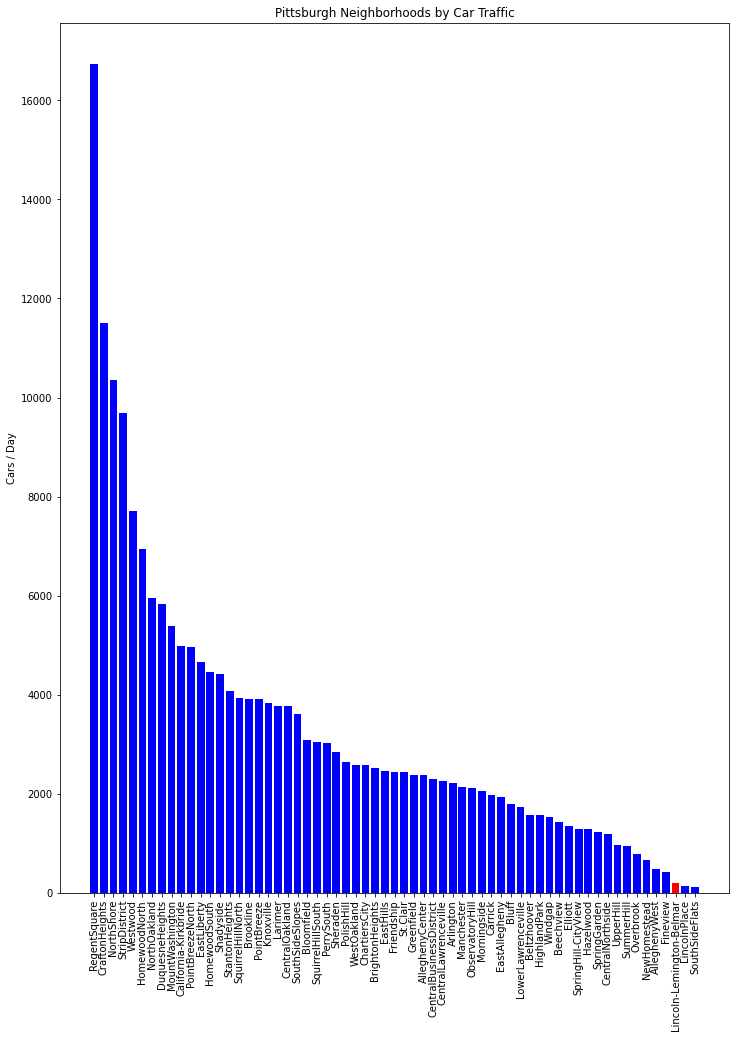

In [9]:
ngh_traf = [(x, traffic_ngh_match[x] ) for x in traffic_ngh_match.keys() ] 
ngh_traf.sort(key=lambda y:y[1], reverse=True)

nghs = [ x[0] for x in ngh_traf ]
traffic = [ x[1] for x in ngh_traf ]

colors = [ 'red' if "Lemington" in x[0] else 'blue' for x in ngh_traf  ] 

x_pos = np.arange(len(traffic))

plt.figure(figsize=(12,16))
plt.xticks(x_pos, nghs, rotation=90)

plt.ylabel("Cars / Day")
plt.title("Pittsburgh Neighborhoods by Car Traffic")

plt.bar(x_pos, traffic, color=colors)
plt.savefig("Nghs By Car Traffic", format="png")
plt.show()

# But For all the PAAC Men (and Women) 
## Bus Stops

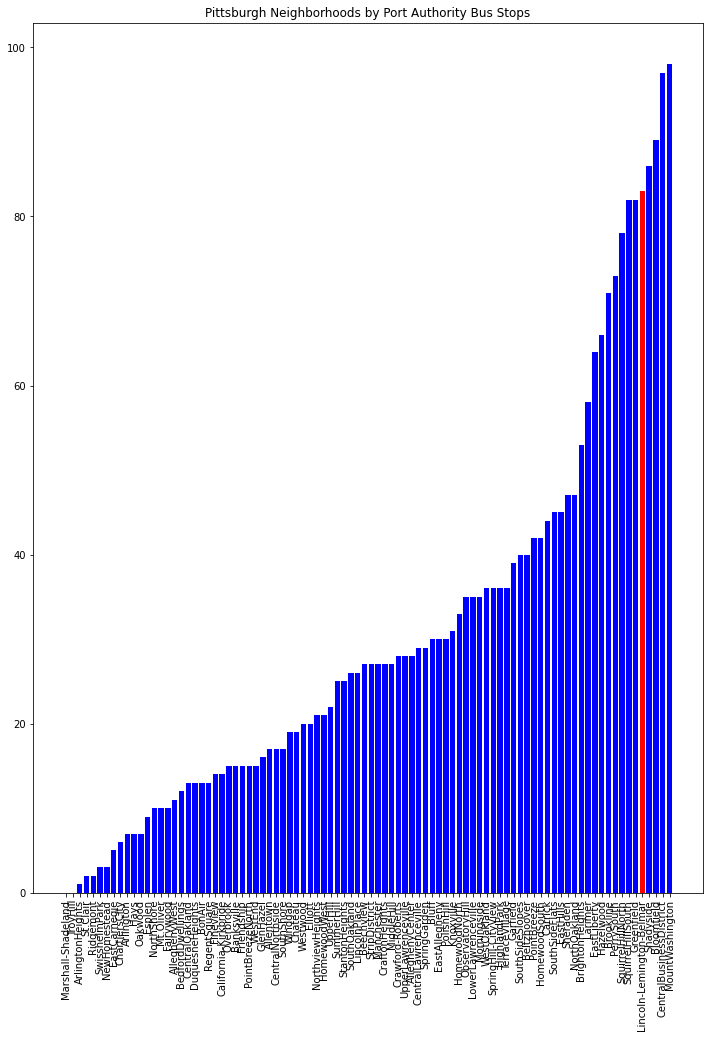

In [10]:
ngh_stops = [(x, paac_ngh_match[x] ) for x in paac_ngh_match.keys() ] 
ngh_stops.sort(key=lambda y:y[1])

nghs = [ x[0] for x in ngh_stops ]
y_var = [ x[1] for x in ngh_stops ]

colors = [ 'red' if "Lemington" in x[0] else 'blue' for x in ngh_stops  ] 

x_pos = np.arange(len(y_var))

plt.figure(figsize=(12,16))
plt.xticks(x_pos, nghs, rotation=90)

plt.title("Pittsburgh Neighborhoods by Port Authority Bus Stops")

plt.bar(x_pos, y_var, color=colors)
plt.savefig("Nghs by PAAC stops.png", format='png')
plt.show()

# Finally, 
## Construction 

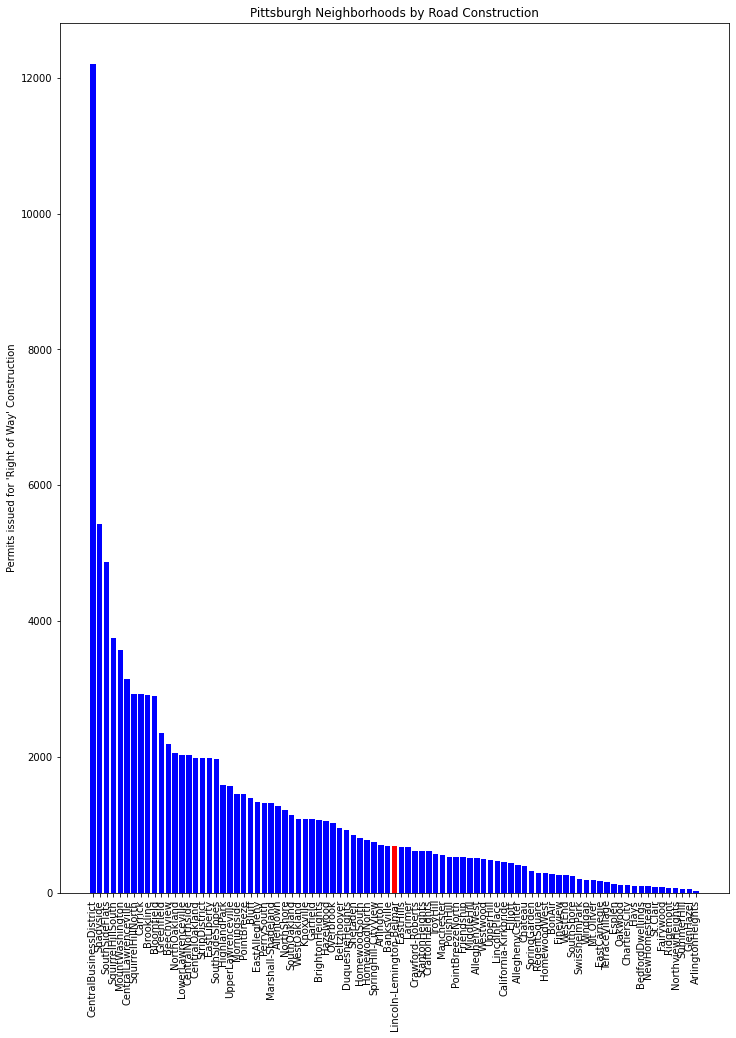

In [11]:
ngh_stops = [(x, permits_ngh_match[x] ) for x in permits_ngh_match.keys() ] 
ngh_stops.sort(key=lambda y:y[1],reverse=True)

nghs = [ x[0] for x in ngh_stops ]
y_var = [ x[1] for x in ngh_stops ]

colors = [ 'red' if "Lemington" in x[0] else 'blue' for x in ngh_stops  ] 

x_pos = np.arange(len(y_var))

plt.figure(figsize=(12,16))
plt.xticks(x_pos, nghs, rotation=90)

plt.title("Pittsburgh Neighborhoods by Road Construction")
plt.ylabel("Permits issued for 'Right of Way' Construction")

plt.bar(x_pos, y_var, color=colors)
plt.savefig("Nghs by Construction.png", format='png')
plt.show() 

# The Best Neighborhood

We decided to use a point system to determine what exactly the best neighborhood was. We essentially sorted each dataset by the data to get rankings. For example, the neighborhood with the least traffic shows up first, then the one with the second least behind it, and so on and so forth. We then assigned each neighborhood point values based on their ranking. For example, the neighborhood with the least traffic got one point, the one with the 2nd least got 2 points, and so on and so forth. The neighborhood with the least amount of points was the best.


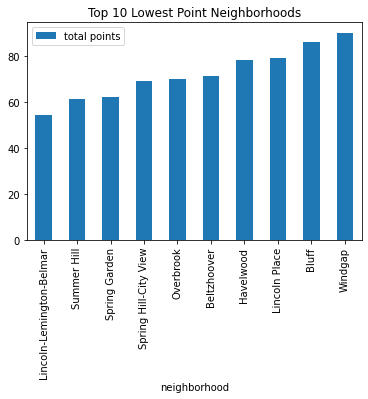

In [6]:
import pandas as pd

d = {'neighborhood': ["Lincoln-Lemington-Belmar", "Summer Hill", "Spring Garden", "Spring Hill-City View", "Overbrook", "Beltzhoover", "Havelwood", "Lincoln Place", "Bluff", "Windgap"], 'total points': [54, 61, 62, 69, 70, 71, 78, 79, 86, 90]}
data = pd.DataFrame.from_dict(d)
data.head()
data.plot.bar(x='neighborhood', y='total points', title="Top 10 Lowest Point Neighborhoods")

## Best neighborhood?

Lincoln-Lemington-Belmar actually does rank highly in 2 out of the 3 datasets. It was 3rd for the least traffic, and 5th for the most bus stops. It was very average for amount of right of way permits (construction) however it can be argued that the right of way permits is the least important metric. So, we can confidently say that the data concludes that Lincoln-Lemington-Belmar is the best neighborhood.

There is a combined dataset with point comparisons .csv file however it was built by hand as there was a lot of trouble that I (Michael) went through attempting to format the file in pandas as all three of the datasets had a different number of entries. It was easier to simply import them into Google Sheets and manually cut out mismatching rows.

# Conclusion (Owen)
While I find our data-driven, transit oriented methodology makes a convincing argument for Lincoln, I have never been to the neighborhood and cannot say that it is my personal favorite. I personally favor Squirrel Hill, with it's prewar brick homes, ample tree cover and 

## Conclusion (Michael)
I personally think that Oakland is my favorite neighborhood. I enjoy it purely because of the food. Of course, there are quite a few different ones but personally, I put Pie Express on a pedestal higher than all others. I could not live without it and it feeds me every day of the week. That is an exaggeration but I cannot actually overstate how much I love Pie Express pizza and all its wonders. Its personal pizzas are the food that I could live on for the rest of my life and that is not an exaggeration. 
I have never been to Lincoln-Lemington-Belmar in my life and because of that I cannot say whether it really is the ‘best’ neighborhood. However, back on track, according to our metric, I personally think that traveling in Oakland is not bad and I have no problems with it. However, according to our data, Oakland is statistically one of the worst neighborhoods to travel in. In the end, the data-driven best neighborhood is very different from my personal, very subjective,best neighborhood.
